In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [9]:
df=pd.read_csv("diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
df.shape

(2000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [14]:
#finding duplicates
df.duplicated


<bound method DataFrame.duplicated of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]>

In [ ]:
df.duplicated().sum()

1256

In [ ]:
#finding garbage value
print(df.isnull().sum())
for i in df.columns:
   print(f"Unique values in {i}:", df[i].unique())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Unique values in Pregnancies: [ 2  0  1  4  8  3  6  5  7 10 12  9 11 13 15 17 14]
Unique values in Glucose: [138  84 145 135 139 173  99 194  83  89 125  80 166 110  81 195 154 117
   0  94  96  75 180 130 120  91 163 122 103 102  90 111 133 106 171 159
 146  71 105 101  88 176 150  73 187 100  44 141 114 109  95 126 129  79
  62 131 112 113  74 137 136 107 123 134 142 144  92  93 151  85 155  76
 160 124  78  97 162 132 118 170 128 108  57 147 156 153 188 152 104 148
  87 179 143 119 181 158 196 184 140 177 197 164 165  86 193 191 161 167
  77 115 182 157 178 116  61 189  98 127  82  72 168 172 175  68 186 198
 121  67 183 174 199  56 169 149  65 190]
Unique values in BloodPressure: [ 62  82   0  68  78  7

In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
df['Glucose'].describe()

,Glucose
count,2000.000000
mean,121.182500
std,32.068636
min,0.000000
25%,99.000000
50%,117.000000
75%,141.000000
max,199.000000


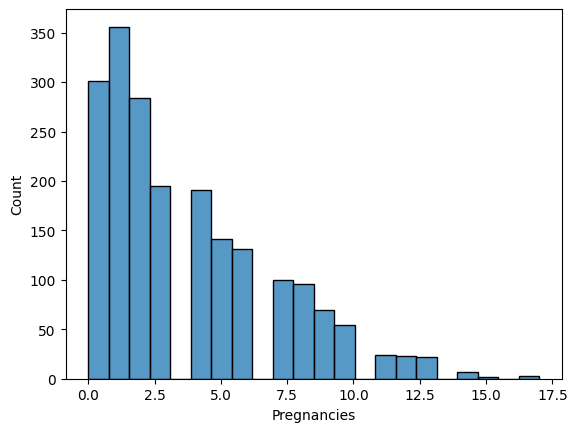

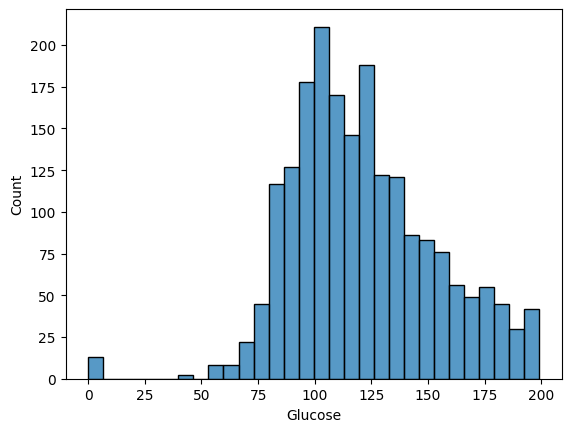

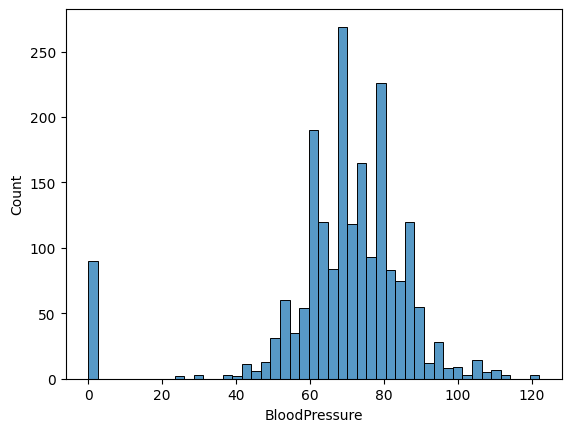

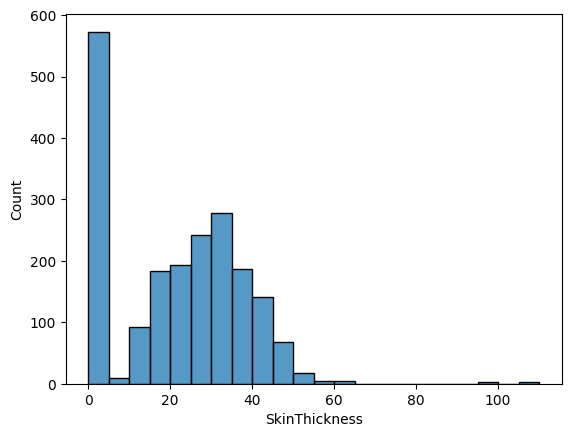

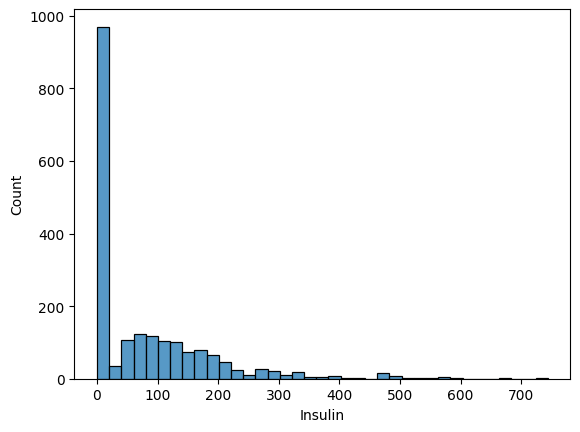

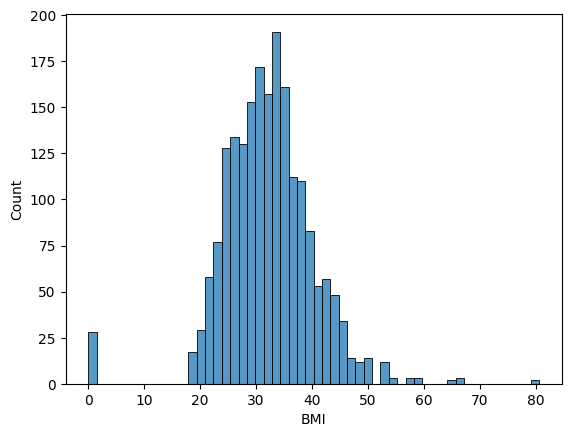

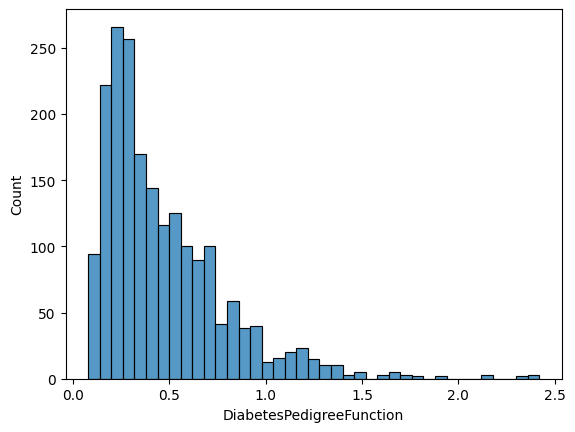

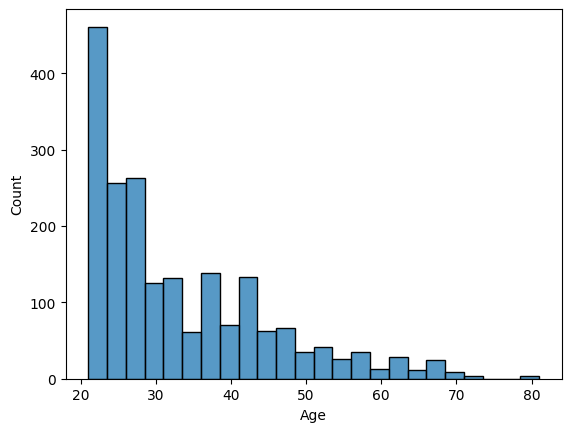

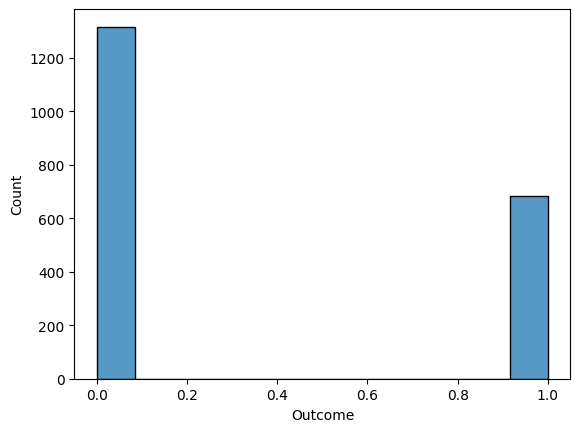

In [ ]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

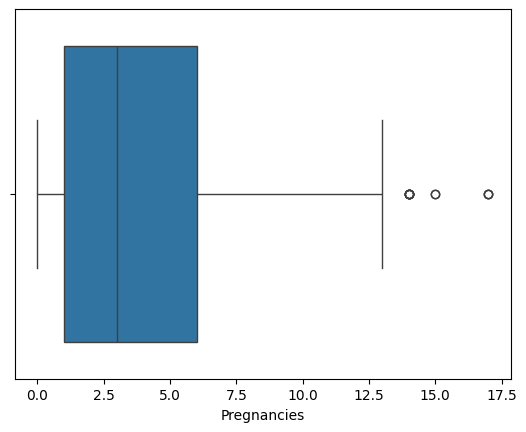

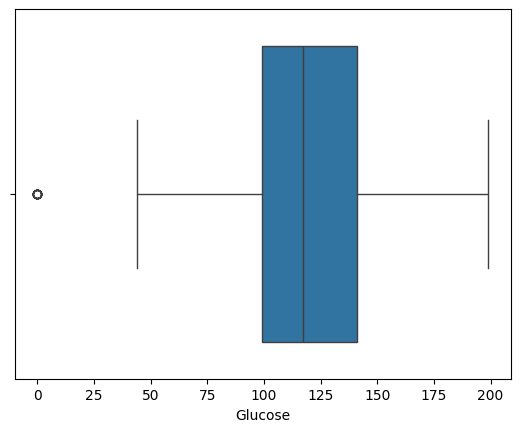

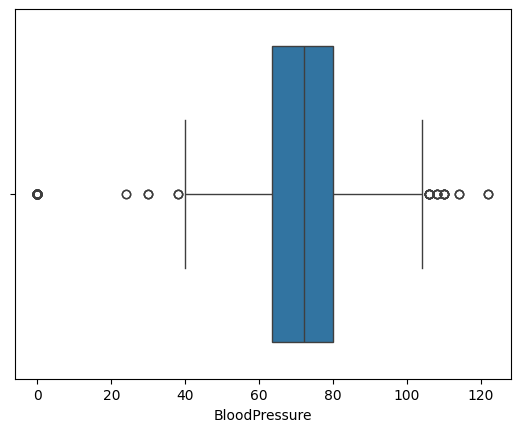

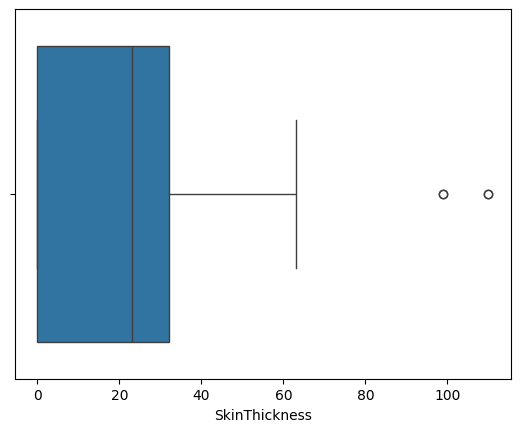

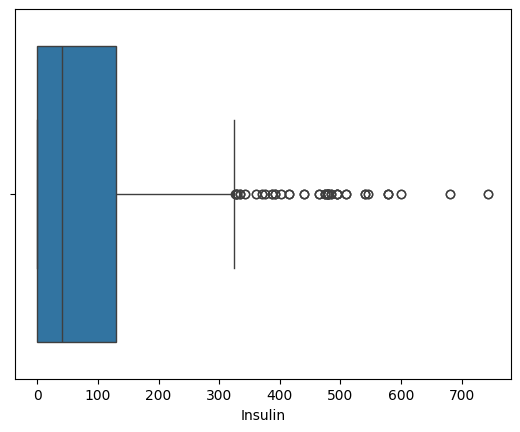

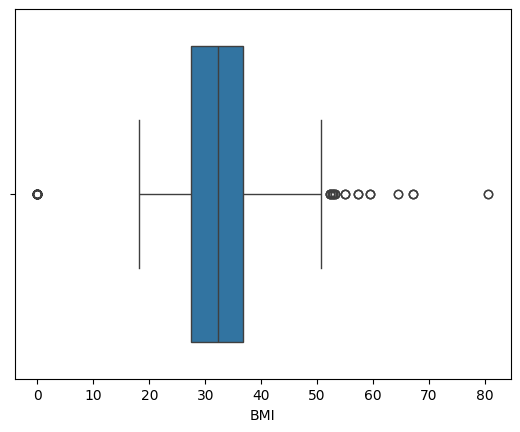

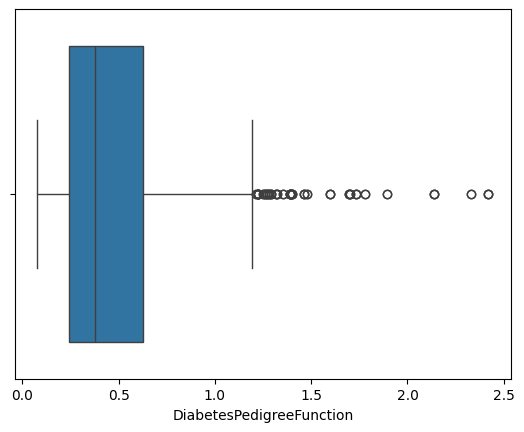

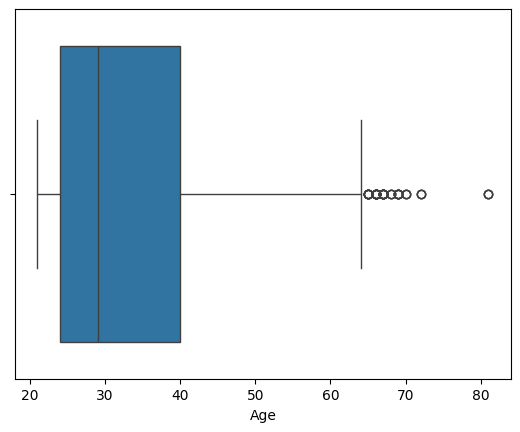

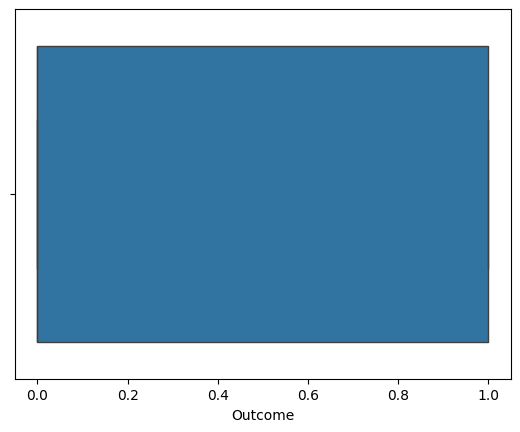

In [ ]:
#boxlpot to identify the outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
#scatterplot to understand the relationship between the data
df.select_dtypes(include="number").columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

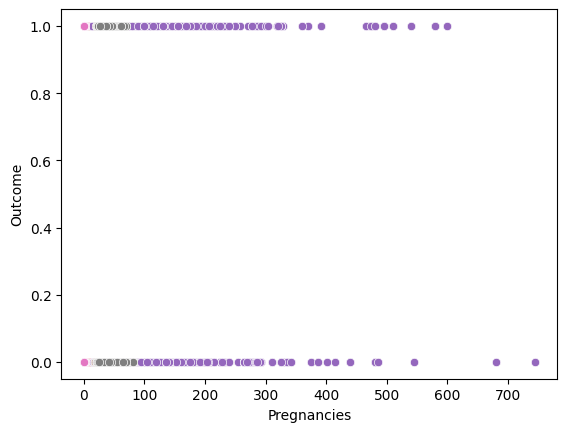

In [ ]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]:
       sns.scatterplot(data=df, x=i,y='Outcome')

In [ ]:
#corelation with heatmap tp interprete the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Figure size 1500x1500 with 0 Axes>

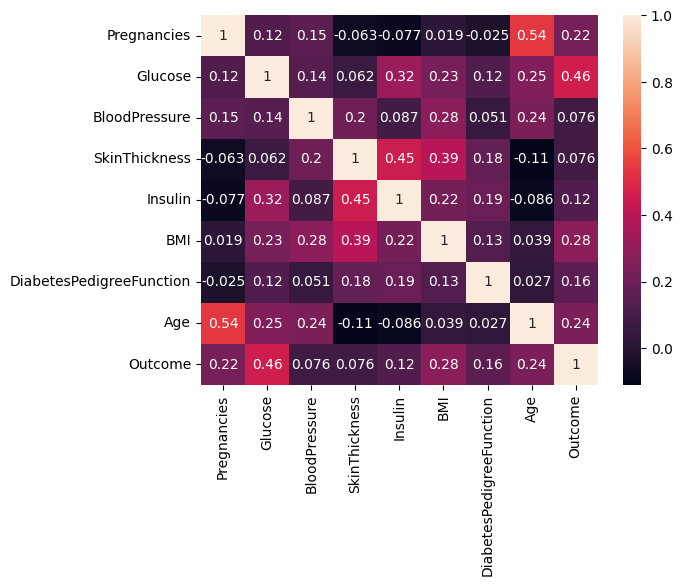

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(s,annot=True)
plt.figure(figsize=(15,15))

In [ ]:
 #chhose the method of imputing missing value
#like mean,median,modeor KNNIputer
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



 #chhose the method of imputing missing value by using ,ean,meadian or mode
for i in["column name"]:
 df[i].fillna(df[i].median(),inpace=True)



In [ ]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [1]:
#outlier treatment
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw



In [12]:
wisker(df['BMI'])

(13.237500000000004, 50.93749999999999)

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
for i in ['BMI','Pregnancies','BloodPressure','SkinThickness']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])



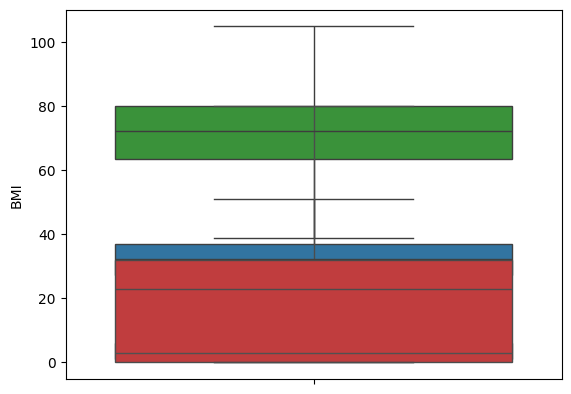

In [17]:
for i in ['BMI','Pregnancies','BloodPressure','SkinThickness']:
  sns.boxplot(df[i])
  plt.show

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138,62.00,35.0,0,33.6000,0.127,47,1
1,0.0,84,82.00,31.0,125,38.2000,0.233,23,0
2,0.0,145,38.75,0.0,0,44.2000,0.630,31,1
3,0.0,135,68.00,42.0,250,42.3000,0.365,24,1
4,1.0,139,62.00,41.0,480,40.7000,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1564,1.0,100,62.00,0.0,0,50.9375,0.152,36,0
1565,0.0,163,40.00,23.0,64,40.7000,0.322,33,0
1566,6.0,139,84.00,37.0,0,50.7000,0.320,50,1
1567,2.0,167,44.00,30.0,140,50.9375,0.452,28,0


In [21]:
 #hot encoding with pd .getdummies
 dummy=pd.get_dummies(data=df,columns=['Pregnancies','Glucose'],drop_first=True)

In [22]:
dummy

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1.0,Pregnancies_2.0,Pregnancies_3.0,...,Glucose_189,Glucose_190,Glucose_191,Glucose_193,Glucose_194,Glucose_195,Glucose_196,Glucose_197,Glucose_198,Glucose_199
0,62.00,35.0,0,33.6000,0.127,47,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,82.00,31.0,125,38.2000,0.233,23,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,38.75,0.0,0,44.2000,0.630,31,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.00,42.0,250,42.3000,0.365,24,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,62.00,41.0,480,40.7000,0.536,21,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,64.00,24.0,55,29.7000,0.370,33,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1996,72.00,42.0,130,32.7000,0.719,36,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,78.00,0.0,0,31.2000,0.382,42,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,104.75,46.0,130,50.9375,0.319,26,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
